# PyTorch Workflow

Let's explore a an example PyTorch end-to-end workflow.

Resources:
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's neural network building blocks for neural networks
import matplotlib.pyplot as plt # for plotting

# Check PyTorch version
torch.__version__

'2.0.0.dev20230215'

## 1. Data (Preparing and Loading)

Data can be almost anything... in machine learning.

* Excel Speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using linear regression formula.

We will use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Test data")

    # Plot model's predictions in red
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", label="Predictions")

    # axis labels and title
    plt.ylabel("y")
    plt.xlabel("X")
    plt.title("Data and model predictions")

    # Show the legend
    plt.legend(prop={'size': 14});


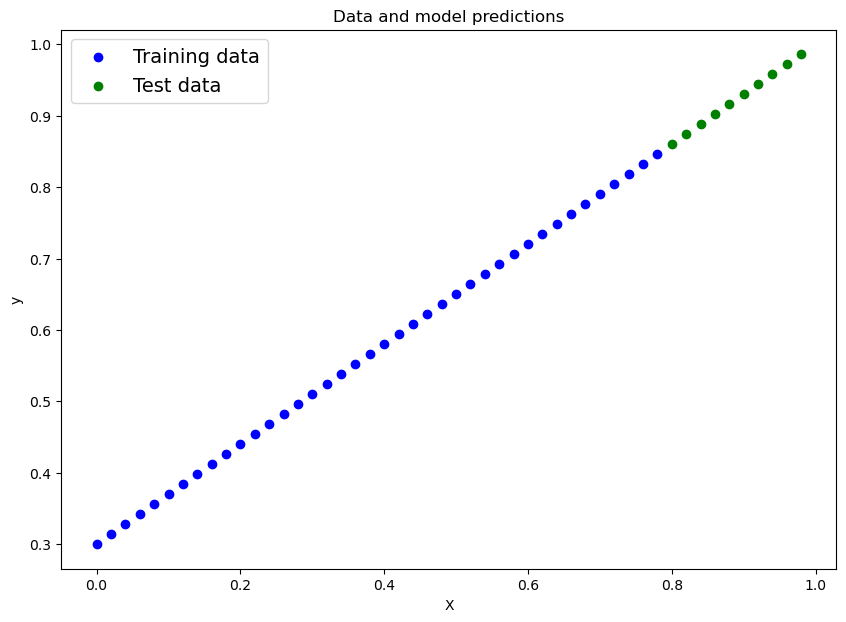

In [7]:
plot_predictions()

## 2. Build model

What our model does:

* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get to closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms: 
1. Gradient descent
2. Backpropagation

In [8]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost evertyhing in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can tihs parameter be updated via gradient descent?
                                                dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
        self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- can tihs parameter be updated via gradient descent?
                                             dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

* **torch.nn** - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter** - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set there for us
* **torch.nn.Module** - The base class for all neural network modeules, if you subclass it, you should overwrite forward()
* **torch.optim** - this is where optimizers in PyTorch live, they will help with gradient descent
* **def forward()** - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we have created a model, let's see what's inside...

So we can check out our model parameters or what's inside our model using `.parameters()`.

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test`based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()`method.

In [11]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

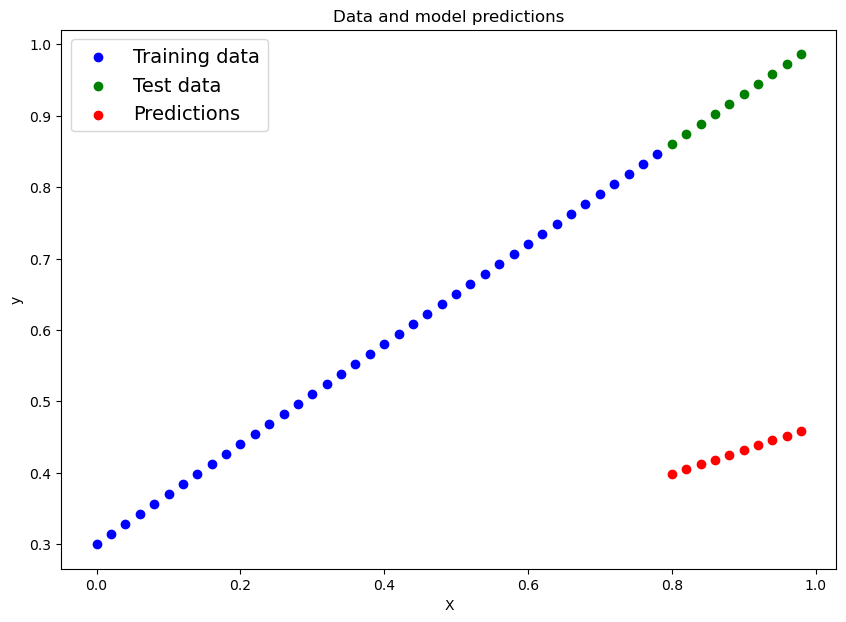

In [13]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* random parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

Note: Loss function may also be called cost function or criterion in different areas. For our case, we are going to tefer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

    * Inside the optimizer yo will often have to set two parameters:
        * `params` - the model parameters yo would like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes) 

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [14]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradientsof each parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [16]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we have set it.)
epochs = 200

# Track different values over time
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()
    
    model_0.eval() # turn off different settings in the model not needed for eval/testing.
    with torch.inference_mode(): # turns off gradient tracking
        # 1. Do forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    # print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}") 


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788740023970604 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020209416747093 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546754717827 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155392535030842 | Test Loss: 0.03233227878808975
Ep

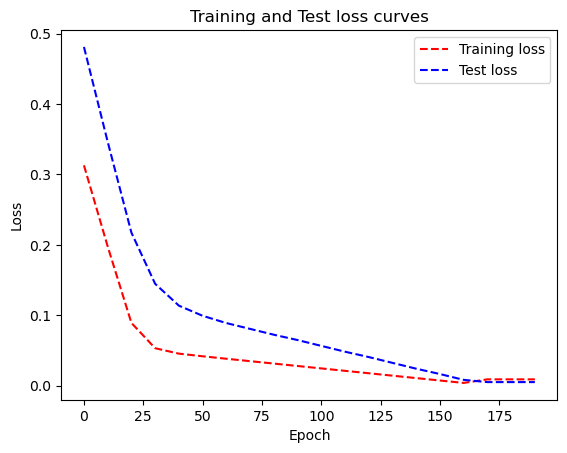

In [17]:
plt.plot(epoch_count, loss_values, 'r--', label='Training loss')
plt.plot(epoch_count, test_loss_values, 'b--', label='Test loss')
plt.title('Training and Test loss curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [18]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [19]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

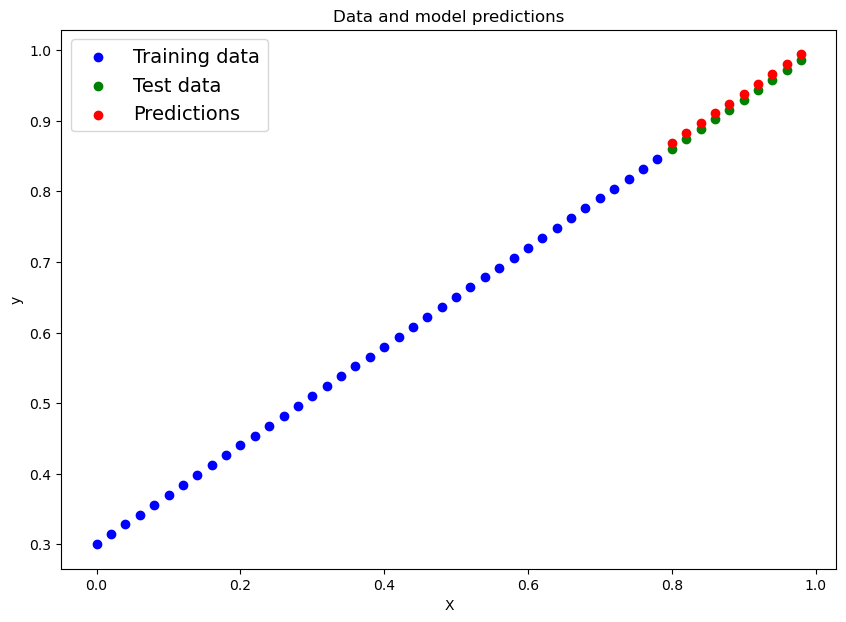

In [20]:
plot_predictions(predictions=y_preds_new)

## 4. Saving a model in PyTorch

There are three main methods you should about for saving and loading PyTorch models:

1. `torch.save()` - allows you to save a model's parameters (weights & biases) to a Python's pickle file (a file with a .pt or .pth extension)
2. `torch.load()` - allows you to load a model's parameters (weights & biases) from a Python's pickle file (a file with a .pt or .pth extension)
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary (a Python dictionary object containing a model's parameters)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
# Save the model's state dictionary
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we will create a new instance of our model class and load the saved `state_dict` into that.

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters).
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [25]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [26]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [27]:
# Make some predictions with our model
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [28]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [29]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0.dev20230215'

Create device-agnostic code.

This means if we have got access to a GPU, out code will use it (for potentially faster computing).

If no GPU is available, the code will default to using CPU.

In [30]:
# Setup device-agnostic code - mps is for Apple Silicon
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Using device: {device}")

Using device: mps


### 6.1 Data

In [31]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, error will pop out
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [33]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

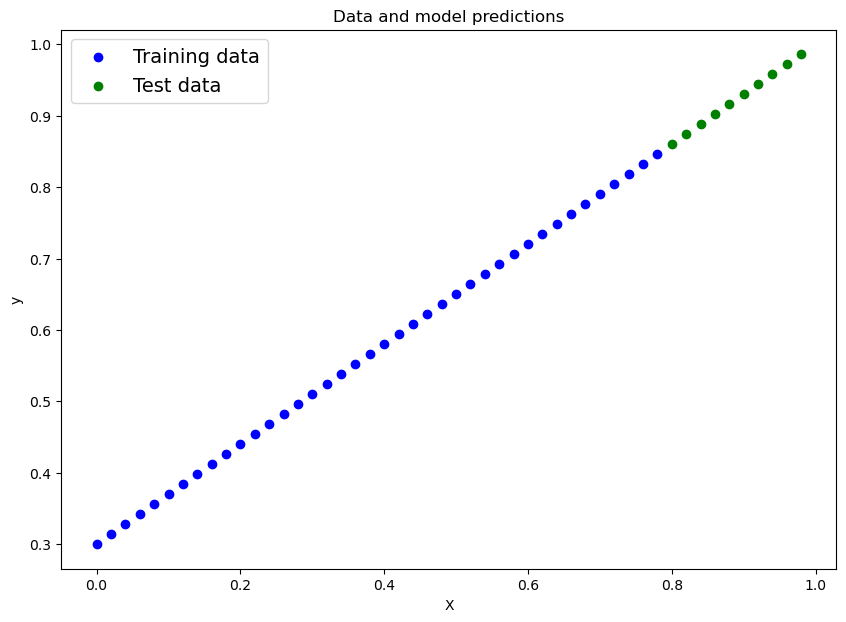

In [34]:
# Plot the data
# Note: if you don't have the plot_predictions() fuction loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [36]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [37]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [38]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

## 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [39]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [42]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

/Users/alp/miniconda3/envs/torch/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: The operator 'aten::sgn.out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1676448526786/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch: 0 | Loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 10 | Loss: 0.4399681091308594 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984672844409943
Epoch: 40 | Loss: 0.09433844685554504 | Test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test loss: 0.04580312594771385
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.01308917161077261 | Test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653176181018353 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645028764382005 | Test loss: 0.013801807537674

In [43]:
model_1.state_dict()

/Users/alp/miniconda3/envs/torch/lib/python3.9/site-packages/torch/_tensor_str.py:125: UserWarning: 1MPS: no support for int64 min/max ops, casting it to int32 (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1676448526786/work/aten/src/ATen/native/mps/operations/ReduceOps.mm:1260.)
  nonzero_finite_min = tensor_totype(nonzero_finite_abs.min())


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

## 6.4 Making and evaluating predictions

In [44]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

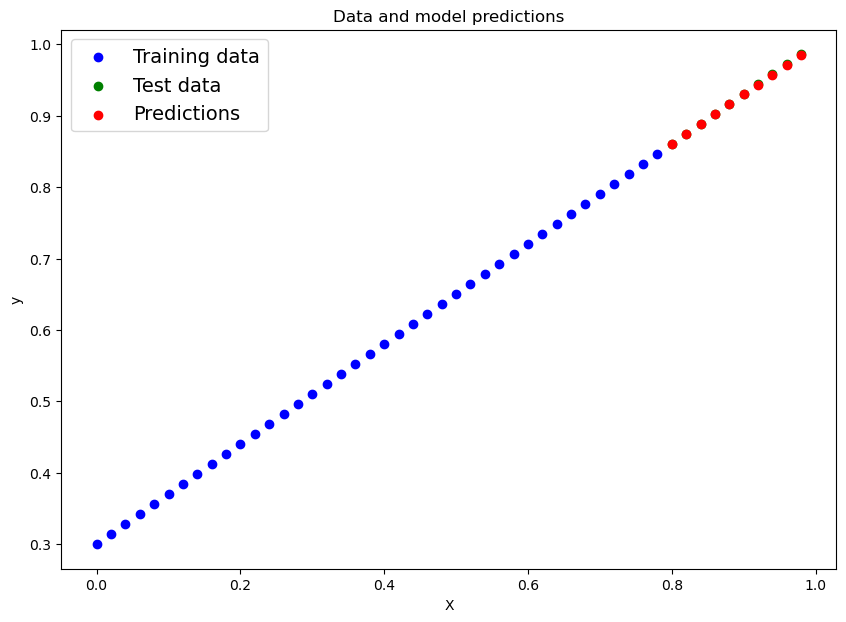

In [46]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

## 6.5 Saving & loading a trained model

In [51]:
from pathlib import Path

# 1. create a models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [52]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [53]:
next(loaded_model_1.parameters()).device

device(type='mps', index=0)

In [54]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
             ('linear_layer.bias', tensor([0.3025], device='mps:0'))])

In [56]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')